In [57]:
%matplotlib inline
from pprint import pprint

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

#from sklearn.linear_model import LinearRegression
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import PolynomialFeatures, StandardScaler
#from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

In [58]:
RAND_SEED = 42
np.random.seed(RAND_SEED)

In [59]:
df_passangers = pd.read_csv("DATA2_passengers.csv")

In [60]:
df_passangers.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Calculando o valor bruto

In [61]:
df_passangers['Valor Bruto']=df_passangers['RoomService']+df_passangers['FoodCourt']+df_passangers['ShoppingMall']+df_passangers['Spa']+df_passangers['VRDeck']
df_passangers

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Valor Bruto
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0


In [62]:
df_passangers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0
Valor Bruto,7785.0,1484.601541,2845.288241,0.0,0.0,736.0,1486.0,35987.0


In [63]:
df_passangers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Valor Bruto   7785 non-null   float64
dtypes: bool(1), float64(7), object(7)
memory usage: 959.4+ KB


In [64]:
df_passangers=df_passangers[df_passangers["Transported"].notna()]
#retirei colunas nome e id pq é individual de cada e não ajuda na classificação
df_passangers.loc[:,["HomePlanet","CryoSleep","Cabin","Destination","Age","VIP","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Transported"]]
df=df_passangers
df["Primeira Cabin"],df["Segunda Cabin"],df["Terceira Cabin"]=df["Cabin"].str.split('/').str
del df["Cabin"]
del df['Name']
del df['PassengerId']

C:\Users\joaob\AppData\Local\Temp/ipykernel_3432/4141909374.py:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df["Primeira Cabin"],df["Segunda Cabin"],df["Terceira Cabin"]=df["Cabin"].str.split('/').str


In [65]:

df["HomePlanet"]=df["HomePlanet"].astype('category')
df["HomePlanet"].cat.categories=[0,1,2]
# 0 é Earth , Europa é 1 e Mars é 2

df["Destination"]=df["Destination"].astype('category')
print(df["Destination"].cat.categories)
df["Destination"].cat.categories=[0,1,2]
# 0 é 55 Canccri e 1 é  PSO J318.5-22, 2 é TRAPPIST-1e

df["Primeira Cabin"]=df["Primeira Cabin"].astype('category')
df["Primeira Cabin"].cat.categories=[0,1,2,3,4,5,6,7]
#0 é A, 1 é B ....6 é F e 7 é T
df["Segunda Cabin"]=df["Segunda Cabin"].astype('category')
#analisando posso deletar pq tem pouquissimos numeros para cada variavel
del df["Segunda Cabin"]

df["Terceira Cabin"]=df["Terceira Cabin"].astype("category")
df["Terceira Cabin"].cat.categories=[0,1]
#P=0 e S=1

Index(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'], dtype='object')


# Análise exploratória


Para variaveis de quant com quali fazer Box plot
para variaveis de quant com quant fazer histograma com valores relativos

In [67]:
df.groupby(by='HomePlanet')["Transported"].value_counts(normalize=True)

HomePlanet  Transported
0           False          0.576054
            True           0.423946
1           True           0.658846
            False          0.341154
2           True           0.523024
            False          0.476976
Name: Transported, dtype: float64

In [68]:
df.groupby(by='Primeira Cabin')["Transported"].value_counts(normalize=True)

Primeira Cabin  Transported
0               False          0.503906
                True           0.496094
1               True           0.734275
                False          0.265725
2               True           0.680054
                False          0.319946
3               False          0.566946
                True           0.433054
4               False          0.642694
                True           0.357306
5               False          0.560129
                True           0.439871
6               True           0.516217
                False          0.483783
7               False          0.800000
                True           0.200000
Name: Transported, dtype: float64

In [70]:
#df.groupby(by='Segunda Cabin')["Transported"].value_counts()

In [71]:
df.groupby(by='Terceira Cabin')["Transported"].value_counts(normalize=True)

Terceira Cabin  Transported
0               False          0.548740
                True           0.451260
1               True           0.555037
                False          0.444963
Name: Transported, dtype: float64

In [72]:
df.groupby(by='CryoSleep')["Transported"].value_counts(normalize=True)

CryoSleep  Transported
False      False          0.671079
           True           0.328921
True       True           0.817583
           False          0.182417
Name: Transported, dtype: float64

In [73]:
df.groupby(by='Destination')["Transported"].value_counts(normalize=True)

Destination  Transported
0            True           0.610000
             False          0.390000
1            True           0.503769
             False          0.496231
2            False          0.528825
             True           0.471175
Name: Transported, dtype: float64

In [74]:
df['Faixa_idade']=pd.cut(df['Age'],np.arange(0,85,5))
oi=df['Faixa_idade'].value_counts(normalize=True)
pd.crosstab(df['Transported'],df['Faixa_idade'])

Faixa_idade,"(0, 5]","(5, 10]","(10, 15]","(15, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]","(50, 55]","(55, 60]","(60, 65]","(65, 70]","(70, 75]","(75, 80]"
Transported,,,,,,,,,,,,,,,,
False,87,89,226,602,808,608,480,413,290,209,164,100,72,21,16,7
True,234,130,296,593,653,599,418,369,290,205,143,110,64,26,11,3


In [75]:
df.groupby(by='VIP')["Transported"].value_counts(normalize=True)

VIP    Transported
False  True           0.506332
       False          0.493668
True   False          0.618090
       True           0.381910
Name: Transported, dtype: float64

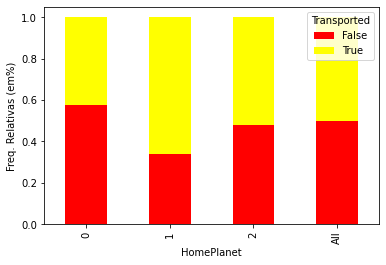

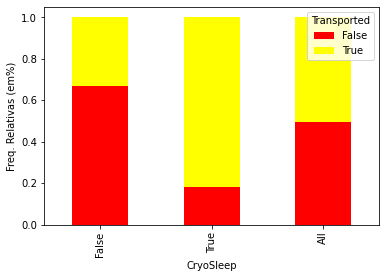

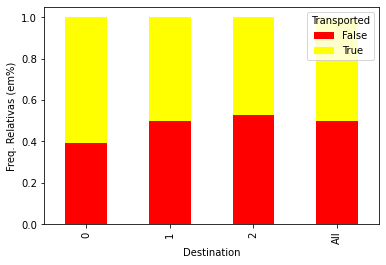

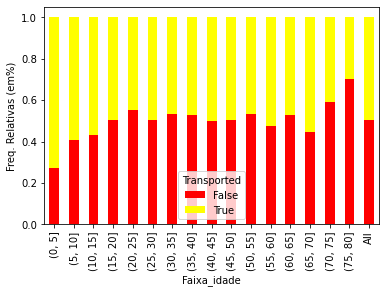

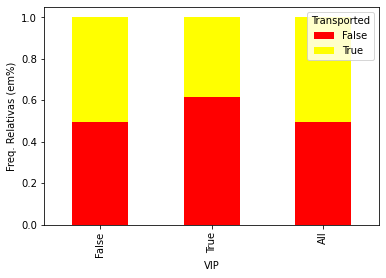

In [76]:
lista=["HomePlanet",'CryoSleep','Destination','Faixa_idade','VIP']
cores = ['red','yellow','green','darkgreen','blue','purple','pink','orange']
n=0
#seria bom fazer uma figura
for i in lista:
    Transported_x_y=pd.crosstab(df[i], df['Transported'], normalize='index',margins=True).round(4)
    Transported_x_y.plot.bar(color=cores, stacked=True)
    plt.ylabel("Freq. Relativas (em%)")
    plt.xlabel(i)
plt.show()

# Análise das informações:


# Manipulando dados

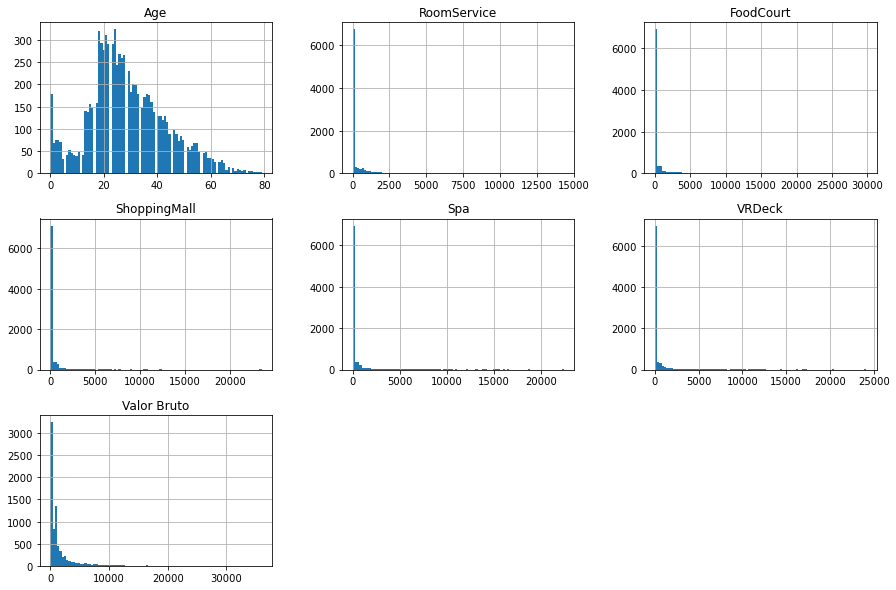

In [77]:
BINS= int(np.sqrt(len(df.index)))
df.hist(bins=BINS,figsize=(15,10));

# Separando Treino e Teste

In [84]:
del df["Faixa_idade"]

In [85]:
Xpassanger=df.loc[:"Transported"]
ypassanger=df.drop(["Transported"],axis=1)

In [90]:
X_trainpassanger, X_testpassanger, y_trainpassanger, y_testpassanger = train_test_split(
    Xpassanger,
    ypassanger,                  
    test_size=0.3,
    random_state=RAND_SEED,
)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X_trainpassanger)
y=y_trainpassanger

In [91]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

classification_models = []
classification_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
classification_models.append(('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)))
classification_models.append(('Kernel SVM', SVC(kernel = 'rbf',gamma='scale')))
classification_models.append(('Naive Bayes', GaussianNB()))
classification_models.append(('Decision Tree', DecisionTreeClassifier(criterion = "entropy")))
classification_models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion="entropy")))

for name, model in classification_models:
  result = cross_val_score(model, X, y, scoring='accuracy')
  print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))


C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1344, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 871, in check_X_y
    X = check_array(X, acc

Logistic Regression: Mean Accuracy = nan% - SD Accuracy = nan%
K Nearest Neighbor: Mean Accuracy = nan% - SD Accuracy = nan%
Kernel SVM: Mean Accuracy = nan% - SD Accuracy = nan%
Naive Bayes: Mean Accuracy = nan% - SD Accuracy = nan%
Decision Tree: Mean Accuracy = nan% - SD Accuracy = nan%
Random Forest: Mean Accuracy = nan% - SD Accuracy = nan%


C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 157, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\joaob\Anaconda3\lib\site-packages\sklearn\utils\

#

# Plotando gráficos boxplot

<AxesSubplot:title={'center':'Valor Bruto'}, xlabel='[Transported]'>

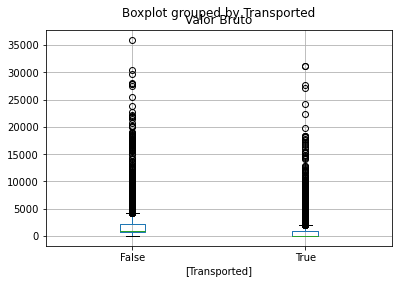

In [88]:
df_passangers.boxplot(['Valor Bruto'], by=['Transported'])

<AxesSubplot:title={'center':'Age'}, xlabel='[Transported]'>

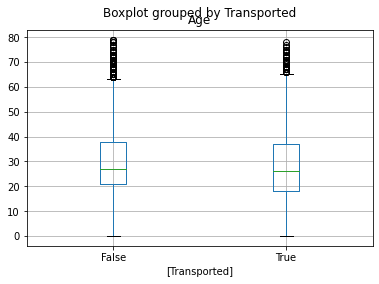

In [89]:
df_passangers.boxplot(['Age'], by=['Transported'])